In [385]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches
from ggplot import *
import pandas as pd
import numpy as np

In [386]:
matches = pd.read_csv(r"C:\Users\Admin\Desktop\New folder\Plotting in Python\IPL Visualization\matches.csv")

In [387]:
colors = {"Chennai Super Kings": "yellow",
          "Deccan Chargers": "bisque",
          "Delhi Daredevils":"navy",
          "Kings XI Punjab":"silver",
          "Kolkata Knight Riders":"darkmagenta",
          "Mumbai Indians":"mediumblue",
          "Rajasthan Royals":"royalblue",
          "Royal Challengers Bangalore":"orangered",
          "Kochi Tuskers Kerala":"lime",
          "Gujarat Lions":"orange",
          "Rising Pune Supergiants":"darkorchid",
          "Pune Warriors":"darkorchid",
          "None":"black",
          "Sunrisers Hyderabad":"chocolate"}

In [388]:
#Replace Pune's entries with their current name
matches = matches.replace(to_replace="Pune Warriors", value="Rising Pune Supergiants")
    

In [389]:
# Number of missing values in each columns
for name in list(matches):
    x= np.sum(matches[name].isnull())
    print("{} has {} missing values".format(name,x))

id has 0 missing values
season has 0 missing values
city has 7 missing values
date has 0 missing values
team1 has 0 missing values
team2 has 0 missing values
toss_winner has 0 missing values
toss_decision has 0 missing values
result has 0 missing values
dl_applied has 0 missing values
winner has 3 missing values
win_by_runs has 0 missing values
win_by_wickets has 0 missing values
player_of_match has 3 missing values
venue has 0 missing values
umpire1 has 0 missing values
umpire2 has 0 missing values
umpire3 has 577 missing values


In [390]:
#Setting up city as "Dubai" as all missing values are for macthes in Dubai
mask = matches["city"].isnull()
matches.loc[mask,"city"] =  "Dubai"


In [391]:
#Setting up none values in winner and player of the match for matches with NaN in these rows
mask = matches["winner"].isnull()
matches.loc[mask, "winner"] = "None"
mask = matches["player_of_match"].isnull()
matches.loc[mask, "player_of_match"] = "None"

In [392]:
# dropping 3rd umpire column as it is useless and having most values as NaN
matches = matches[list(matches)[:-1]]

# Visualization Starts

In [393]:
Temp = pd.DataFrame(matches.groupby("season").size(), columns=["Total_Matches"])

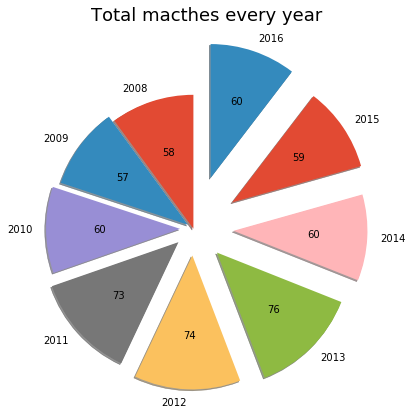

In [394]:
# Number of macthes by year
fig, ax = plt.subplots(figsize=(7, 7))


explode = [0+i/10 for i in range(len(Temp))]

ax.pie(list(Temp["Total_Matches"]), explode=explode,shadow=True, startangle=90, radius=2,labels=list(Temp.index), autopct=lambda p: '{:.0f}'.format(p * sum(Temp["Total_Matches"]) / 100))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("Total macthes every year",fontdict = {'fontsize':18})
plt.show()

In [395]:
#Wins in each season by each team
Temp = pd.DataFrame(matches.groupby(["season","winner"]).size(),columns=["wins"]).reset_index()
Temp

,season,winner,wins
0,2008,Chennai Super Kings,9
1,2008,Deccan Chargers,2
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,10
4,2008,Kolkata Knight Riders,6
5,2008,Mumbai Indians,7
6,2008,Rajasthan Royals,13
7,2008,Royal Challengers Bangalore,4
8,2009,Chennai Super Kings,8
9,2009,Deccan Chargers,9


In [396]:
#Total matches played by each team
temp = pd.DataFrame(matches.groupby("team1").size(),columns=["Team1"]).merge(pd.DataFrame(matches.groupby("team2").size(),columns=["Team2"]),left_index=True, right_index=True, how = 'left')
temp["Total"] = temp["Team1"].add(temp["Team2"])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


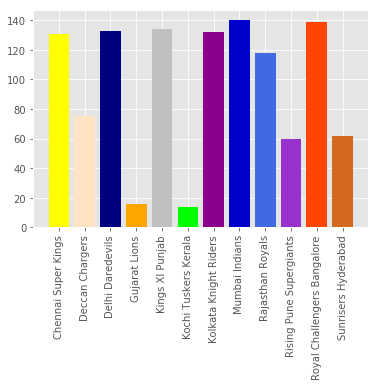

In [397]:
fig, ax = plt.subplots()
loc = list(range(1,len(temp)+1))
print(loc)
ax.bar(loc,temp["Total"],color=[colors[x] for x in list(temp.index)])
ax.set_xticks([])
ticks = ax.set_xticks(list(range(1,len(temp)+1)))
labels = ax.set_xticklabels(list(temp.index),rotation=90)

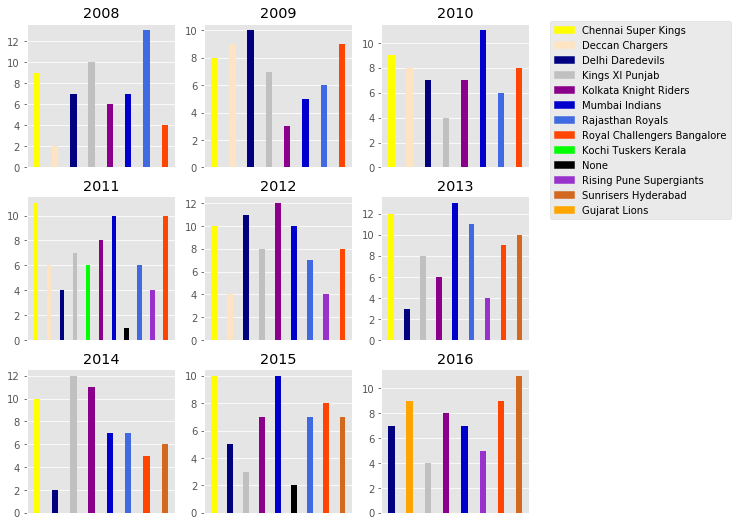

In [398]:
fig,ax = plt.subplots(nrows = 3, ncols = 3, figsize = (9,9))

i = 0
j = 0
count = 0
barwidth = 0.35
for season in  Temp["season"].unique():
    loc = list(range(1,np.sum(Temp["season"]==season)+1))
    ax[i,j].bar(loc,Temp[Temp["season"]==season]["wins"],barwidth,color=[colors[x] for x in list(Temp[Temp["season"]==season]["winner"])])
    ax[i,j].set_xticks([])
    ax[i,j].set_title(season)
    if (count >= 2):
        count = 0
        j = count
        i+=1
    else:
        count+=1
        j+=1
        
red_patch=[]
for label in list(Temp["winner"].unique()):
    x =[mpatches.Patch(color=colors[label],label = label)]
    red_patch = red_patch + x
plt.legend(handles=red_patch,bbox_to_anchor=(1.4 ,3.15 ,1.,0.3))


plt.show()


In [399]:
#Wins at each venue by each team
Temp = pd.DataFrame(matches.groupby(["city","winner"]).size(),columns=["wins"]).reset_index()
Temp

,city,winner,wins
0,Abu Dhabi,Chennai Super Kings,1
1,Abu Dhabi,Kings XI Punjab,2
2,Abu Dhabi,Kolkata Knight Riders,1
3,Abu Dhabi,Rajasthan Royals,3
4,Ahmedabad,Delhi Daredevils,1
5,Ahmedabad,Kings XI Punjab,1
6,Ahmedabad,Mumbai Indians,1
7,Ahmedabad,Rajasthan Royals,7
8,Ahmedabad,Royal Challengers Bangalore,1
9,Ahmedabad,Sunrisers Hyderabad,1


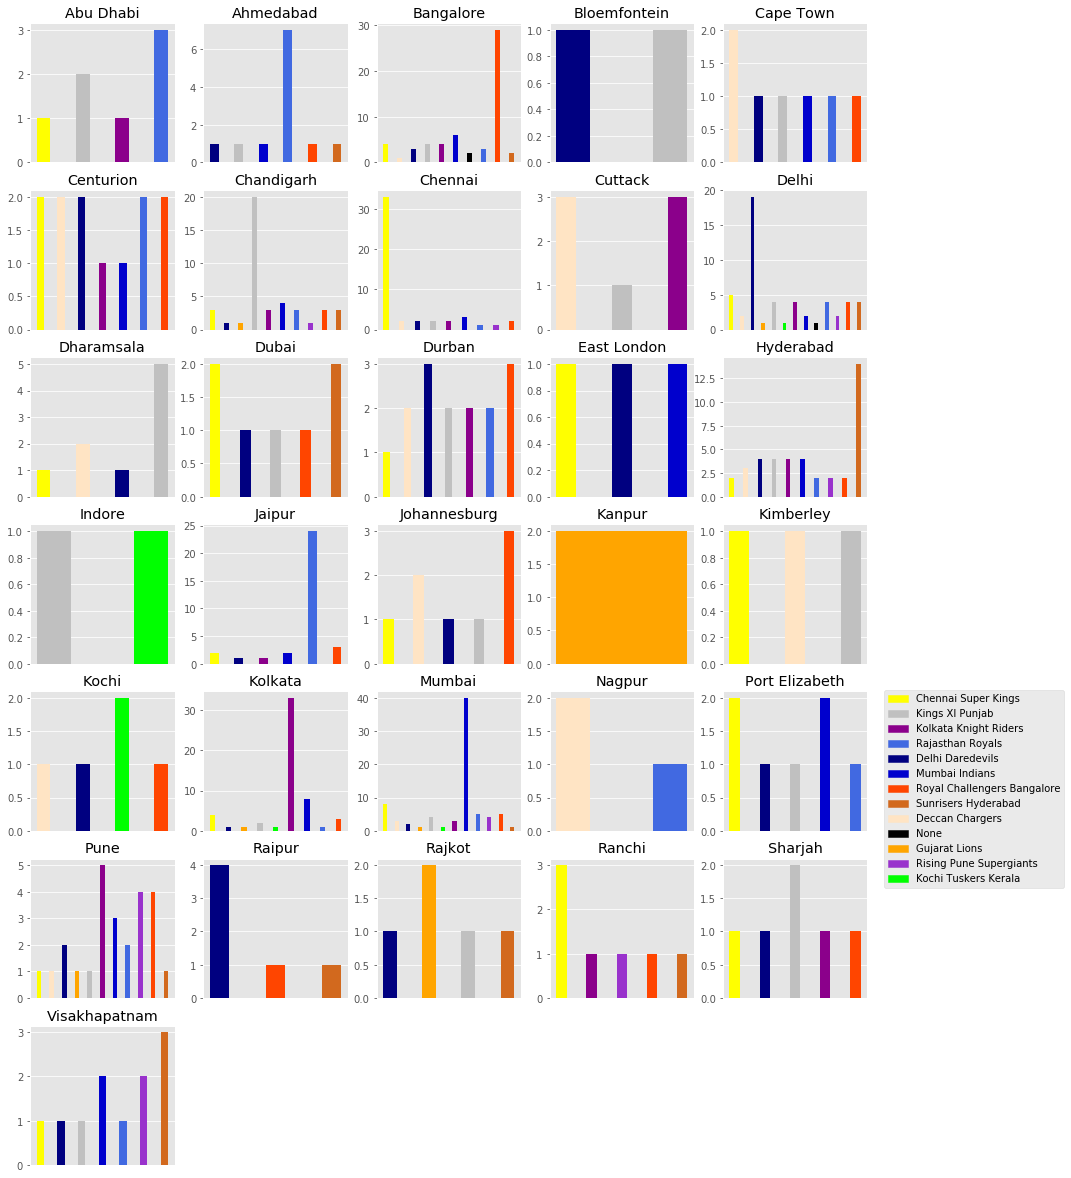

In [400]:
fig,ax = plt.subplots(nrows = 7, ncols = 5, figsize = (15,21))

i = 0
j = 0
count = 0
barwidth = 0.35

for city in  Temp["city"].unique():
    loc = list(range(1,np.sum(Temp["city"]==city)+1))
    ax[i,j].bar(loc,Temp[Temp["city"]==city]["wins"],barwidth,color=[colors[x] for x in list(Temp[Temp["city"]==city]["winner"])])
    ax[i,j].set_xticks([])
    ax[i,j].set_title(city)
    if (count >= 4):
        count = 0
        j = count
        i+=1
    else:
        count+=1
        j+=1
for l in range(count,5):
    ax[i,count].spines['top'].set_visible(False)
    ax[i,count].spines['right'].set_visible(False)
    ax[i,count].spines['left'].set_visible(False)
    ax[i,count].spines['bottom'].set_visible(False)
    ax[i,count].set_xticks([])
    ax[i,count].set_yticks([])
    ax[i,count].patch.set_facecolor("white")
    count+=1
red_patch=[]
for label in list(Temp["winner"].unique()):
    x =[mpatches.Patch(color=colors[label],label = label)]
    red_patch = red_patch + x
plt.legend(handles=red_patch,bbox_to_anchor=(1.4 ,3.15 ,1.,0.3))


plt.show()


In [401]:
#Creating a column for comparing toss wins and match wins matches["TosswinnerMatchwinner"] =
matches["TosswinnerMatchwinner"] = matches.apply(lambda x: 1 if x["toss_winner"]==x["winner"] else 0,axis=1)

In [402]:
#Toss wins result in how many wins
Temp = matches.groupby(["toss_winner"]).agg({"toss_winner":'count',"TosswinnerMatchwinner":np.sum})
Temp

,toss_winner,TosswinnerMatchwinner
toss_winner,,
Chennai Super Kings,66,42
Deccan Chargers,43,19
Delhi Daredevils,64,28
Gujarat Lions,8,6
Kings XI Punjab,64,26
Kochi Tuskers Kerala,8,4
Kolkata Knight Riders,69,38
Mumbai Indians,74,41
Rajasthan Royals,63,34


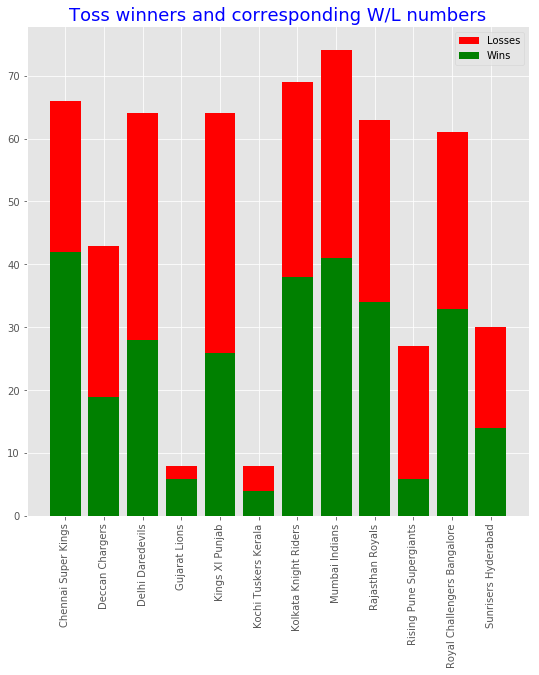

In [403]:
fig, ax = plt.subplots(figsize=(9,9))
loc = list(range(1,len(Temp)+1))
l1 =ax.bar(loc,list(Temp["toss_winner"]),color="r")
l2 = ax.bar(loc,list(Temp["TosswinnerMatchwinner"]),bottom=Temp["toss_winner"]-Temp["toss_winner"],color="g")
ax.set_xticks([])
ticks = ax.set_xticks(list(range(1,len(Temp)+1)))
labels = ax.set_xticklabels(list(Temp.index),rotation=90)
ax.set_title("Toss winners and corresponding W/L numbers",fontdict = {'fontsize':18},color="blue")
ax.legend([l1,l2],["Losses","Wins"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [404]:
#Toss winners, bat or field and match winners
# Temp = pd.DataFrame(matches.groupby(["toss_winner"]).size(),columns=["tosswins"]).reset_index()
Temp = matches.groupby(["toss_winner","toss_decision"]).agg({"toss_decision":'count',"TosswinnerMatchwinner":np.sum})
Temp

toss_decision  \
toss_winner                 toss_decision                  
Chennai Super Kings         bat                       44   
                            field                     22   
Deccan Chargers             bat                       24   
                            field                     19   
Delhi Daredevils            bat                       23   
                            field                     41   
Gujarat Lions               field                      8   
Kings XI Punjab             bat                       25   
                            field                     39   
Kochi Tuskers Kerala        bat                        3   
                            field                      5   
Kolkata Knight Riders       bat                       30   
                            field                     39   
Mumbai Indians              bat                       38   
                            field                     36   
Rajasthan Royals            bat                       28   
                            field                     35   
Rising Pune Supergiants     bat                       14   
                            field                     13   
Royal Challengers Bangalore bat                       16   
                            field                     45   
Sunrisers Hyderabad         bat                       17   
                            field                     13   

                                           TosswinnerMatchwinner  
toss_winner                 toss_decision                         
Chennai Super Kings         bat                               29  
                            field                             13  
Deccan Chargers             bat                               11  
                            field                              8  
Delhi Daredevils            bat                                8  
                            field                             20  
Gujarat Lions               field                              6  
Kings XI Punjab             bat                                5  
                            field                             21  
Kochi Tuskers Kerala        bat                                0  
                            field                              4  
Kolkata Knight Riders       bat                               15  
                            field                             23  
Mumbai Indians              bat                               21  
                            field                             20  
Rajasthan Royals            bat                               13  
                            field                             21  
Rising Pune Supergiants     bat                                3  
                            field                              3  
Royal Challengers Bangalore bat                                7  
                            field                             26  
Sunrisers Hyderabad         bat                                6  
                            field                              8

In [405]:
# fig, ax = plt.subplots(nrows = 3, ncols=4,figsize = (12,9),sharex=True,sharey=True) # note we must use plt.subplots, not plt.subplot

# i = 0
# j = 0
# count=0

# for team in list(Temp.index.get_level_values('toss_winner').unique()):
#     ax[i,j].patch.set_facecolor(colors[team])
#     if ((team,"bat") in Temp.index):
#         ax[i,j].bar([1,2],Temp.loc[team,"bat"],color=colors[team],edgecolor="black",linewidth=2,hatch="x")
#         ax[i,j].set_xticks([1.5,6.5])
#         ax[i,j].set_xticklabels(["BAT","FIELD"],rotation=45,fontsize=12)
#     else:
#         ax[i,j].bar([1,2],[0,0],color=colors[team],edgecolor="black",linewidth=2)
        
#     if ((team,"field") in Temp.index):
#         ax[i,j].bar([6,7],Temp.loc[team,"field"],color=colors[team],edgecolor="black",linewidth=2,hatch="o")
#     else:
#         ax[i,j].bar([6,7],[0,0],color=colors[team],edgecolor="black",linewidth=2)
    
#     if (count >= 3):
#         count = 0
#         j = count
#         i+=1
#     else:
#         count+=1
#         j+=1

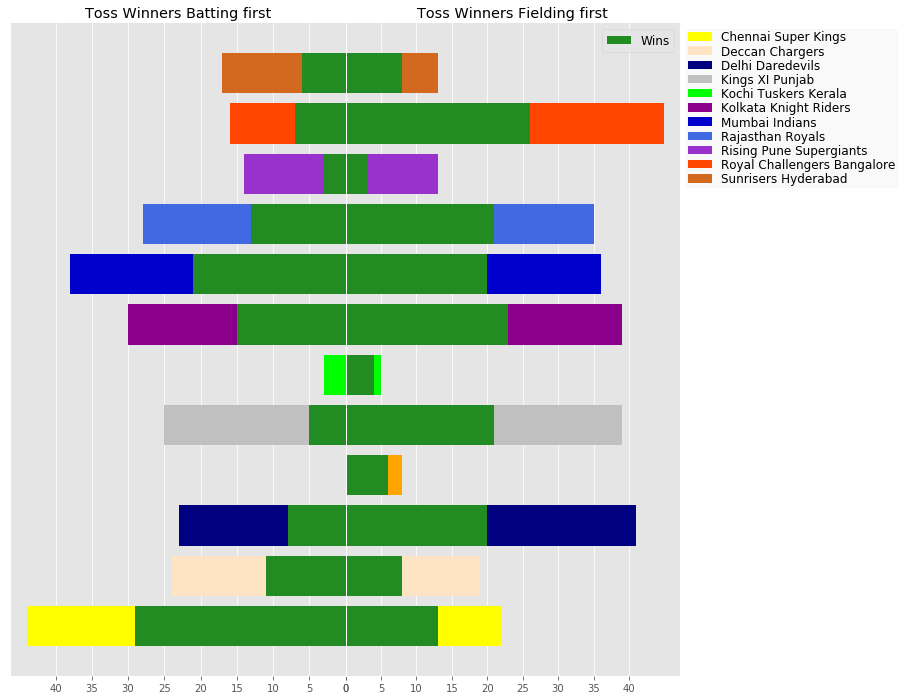

In [421]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

locx = list(range(0,len(Temp.index.get_level_values('toss_winner').unique())))
barwidth = 0.35

for loc in locx:
    label = Temp.index.get_level_values('toss_winner').unique()[loc]
    if ((label,"bat") in Temp.index):
        bar1, = ax[0].barh(loc,Temp.loc[label,"bat"][1],color="forestgreen")
        x = bar1
        bar1, = ax[0].barh(loc,Temp.loc[label,"bat"][0]-Temp.loc[label,"bat"][1],left=Temp.loc[label,"bat"][1],color=colors[label],label=label)
    else:
        bar1, = ax[0].barh(loc,0)
    if ((label,"field") in Temp.index):
        bar, = ax[1].barh(loc,Temp.loc[label,"field"][1],color="forestgreen")
        bar, = ax[1].barh(loc,Temp.loc[label,"field"][0]-Temp.loc[label,"field"][1],left=Temp.loc[label,"field"][1],color=colors[label],label=label)
    else:
        bar, = ax[1].barh(loc,0)
        
ax[0].set_yticks([])
ax[0].set_xticks(list(range(0,45,5)))
ax[1].set_yticks([])
ax[1].set_xticks(list(range(0,45,5)))

ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)

ax[0].invert_xaxis()

ax[0].set_title("Toss Winners Batting first")
ax[1].set_title("Toss Winners Fielding first")

box1 = ax[0].get_position()
ax[0].set_position([box1.x0, box1.y0, box1.width * 0.7, box1.height])
box2 = ax[1].get_position()
ax[1].set_position([box2.x0, box2.y0, box2.width * 0.7, box2.height])

fig.subplots_adjust(wspace=0, hspace=0)

l = ax[0].legend(loc="upper left", fontsize=12,framealpha=0.2, markerscale=5,labelspacing=0.1,borderpad=0.1
                 ,bbox_to_anchor=(2, 1))
ax[1].legend(handles=[x], labels=["Wins"], fontsize=12,bbox_to_anchor=(1, 1))
plt.show()

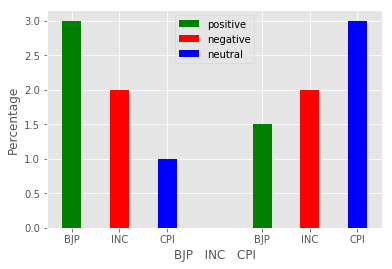

In [431]:
fig,ax = plt.subplots()
ax.set_ylabel('Percentage')
ax.set_xlabel('BJP   INC   CPI')

ax.set_xticks([2,2.5,3,4,4.5,5])
ax.set_xticklabels(["BJP","INC","CPI","BJP","INC","CPI"])

vals = [3]
width = 0.2
rects4 = ax.bar(2.0, vals, width, color='g')
als = [2]
rects5 = ax.bar(2.5, als, width, color='r')
ls = [1]
rects6 = ax.bar(3.0, ls, width, color='b')
iyvals = [1.5]
rects7 = ax.bar(4.0, iyvals, width, color='g')
izvals = [2]
rects8 = ax.bar(4.5, izvals, width, color='r')
iwvals = [3]
rects9 = ax.bar(5.0, iwvals, width, color='b')

ax.legend( (rects4,rects5,rects6), ('positive','negative','neutral') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()

        ax.text(rect.get_x()+rect.get_width()/2, 1*h, '%d'%int(h),
                ha='center', va='bottom')
plt.show()